# Visualizing Real World data can be tough

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# df = nx.to_pandas_edgelist(G)
# df.to_csv('facebook.csv', index=False, )

## Read Facebook's graph database

In [3]:
import pandas as pd
df = pd.read_csv('facebook.csv')

In [5]:
df.head()

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


# Facebook is written as an adjacency list

The actual facebook dataset is written as an adjacency list. I've just downloaded it as a csv file for visualization of what it represents. However, I converted it into an edge list for easier visualization.

In [59]:
# Edge list
df.head()

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


## Adjacency list

In [52]:
f = {'target':list}
df.loc[(df.source == 10) | (df.source == 100), :].groupby('source', as_index=False).agg(f)

,source,target
0,10,"[67, 142, 169, 200, 277, 285, 291, 323, 332]"
1,100,"[119, 150, 163, 189, 217, 269, 323]"


## Adjacency matrix

In [55]:
pd.crosstab(df.loc[(df.source == 10) | (df.source == 100), 'source'], df.loc[(df.source == 10) | (df.source == 100), 'target'])

target,67,119,142,150,163,169,189,200,217,269,277,285,291,323,332
source,,,,,,,,,,,,,,,
10,1,0,1,0,0,1,0,1,0,0,1,1,1,1,1
100,0,1,0,1,1,0,1,0,1,1,0,0,0,1,0


## Reading from adjacency list

In [7]:
G = nx.read_adjlist('facebook_social_graph.adjlist')

In [6]:
# G = nx.from_pandas_edgelist(df)

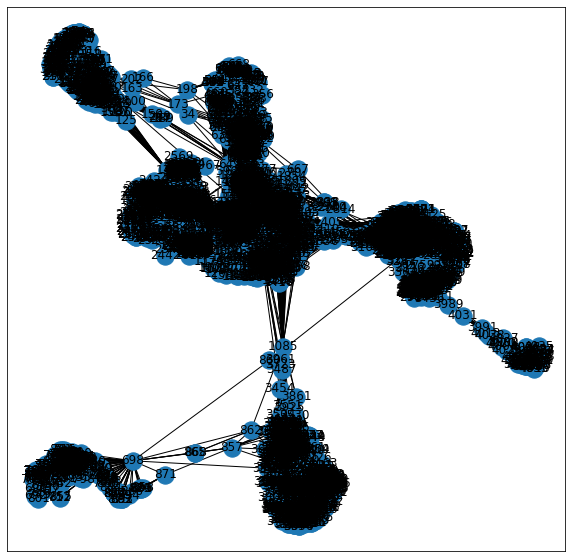

In [65]:
nx.draw_networkx(G)

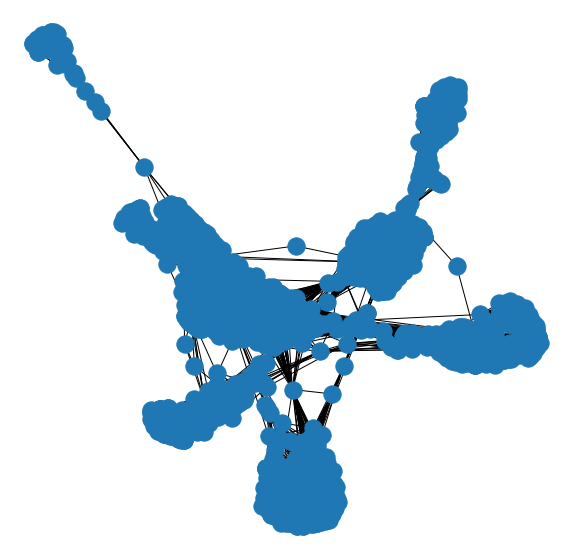

In [66]:
#removing labels
plt.axis('off')
nx.draw_networkx(G, with_labels=False)

In [ ]:
# changing node_size and edge width
plt.axis('off')
nx.draw_networkx(G, with_labels=False, node_size=20, width=0.1)

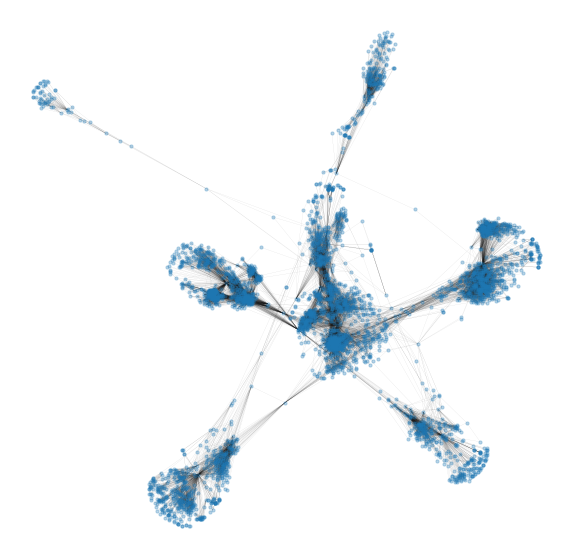

In [14]:
#changing node_size and edge width
plt.axis('off')
nx.draw_networkx(G, with_labels=False, node_size=10, width=0.1, alpha=0.3)

In [10]:
pos = nx.spring_layout(G)

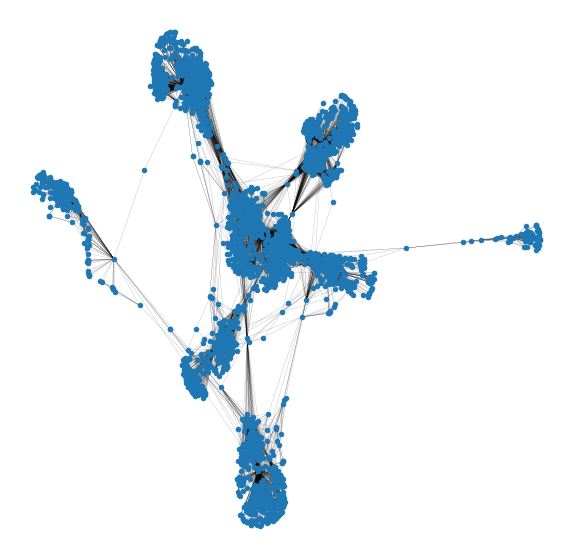

In [11]:
#spring layout
plt.axis('off')
nx.draw_networkx(G, with_labels=False, pos=pos, node_size=20, width=0.1)

In [68]:
G.degree

DegreeView({'0': 347, '1': 17, '2': 10, '3': 17, '4': 10, '5': 13, '6': 6, '7': 20, '8': 8, '9': 57, '10': 10, '11': 1, '12': 1, '13': 31, '14': 15, '15': 1, '16': 9, '17': 13, '18': 1, '19': 16, '20': 15, '21': 65, '22': 11, '23': 17, '24': 16, '25': 69, '26': 68, '27': 5, '28': 13, '29': 13, '30': 17, '31': 23, '32': 6, '33': 2, '34': 5, '35': 2, '36': 11, '37': 1, '38': 9, '39': 15, '40': 44, '41': 24, '42': 2, '43': 1, '44': 6, '45': 12, '46': 5, '47': 2, '48': 22, '49': 4, '50': 11, '51': 7, '52': 2, '53': 31, '54': 8, '55': 17, '56': 78, '57': 15, '58': 12, '59': 19, '60': 8, '61': 3, '62': 26, '63': 6, '64': 7, '65': 12, '66': 15, '67': 76, '68': 9, '69': 10, '70': 2, '71': 3, '72': 24, '73': 10, '74': 1, '75': 14, '76': 3, '77': 6, '78': 9, '79': 12, '80': 23, '81': 3, '82': 34, '83': 7, '84': 13, '85': 14, '86': 6, '87': 13, '88': 20, '89': 8, '90': 2, '91': 8, '92': 21, '93': 8, '94': 22, '95': 6, '96': 9, '97': 3, '98': 49, '99': 13, '100': 9, '101': 19, '102': 6, '103': 16,

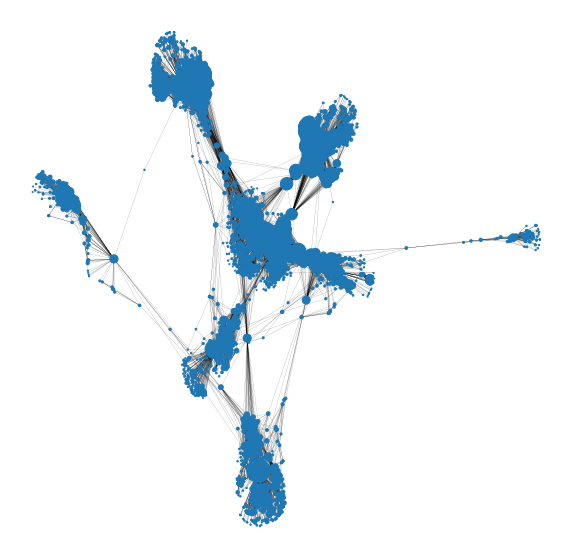

In [12]:
#giving nodesize by degree

plt.axis('off')
node_sizes = list(map(lambda node: node[1], list(G.degree)))
nx.draw_networkx(G, with_labels=False, pos=pos, node_size=node_sizes, width=0.1)

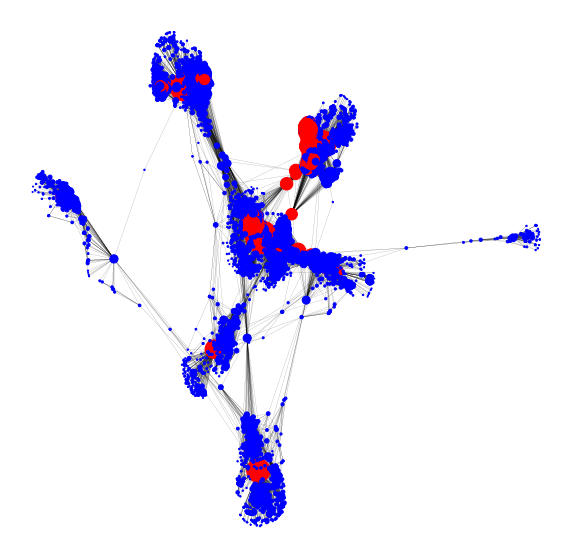

In [13]:
#color by degree 

plt.axis('off')
node_sizes = list(map(lambda node: node[1], list(G.degree)))
node_colors = list(map(lambda degree: 'b' if degree < 100 else 'r', node_sizes))
nx.draw_networkx(G, with_labels=False, pos=pos, node_size=node_sizes, node_color=node_colors, width=0.1)

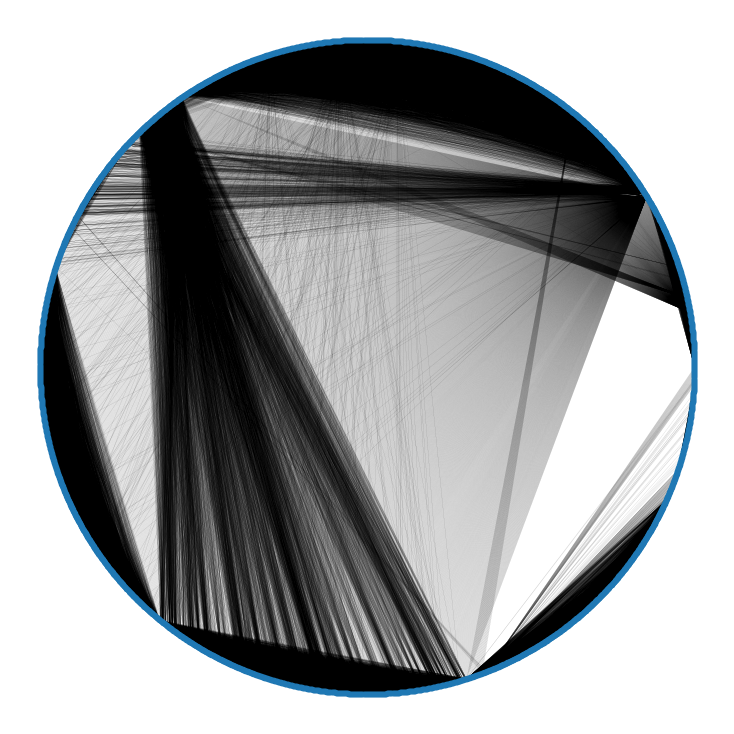

In [14]:
nx.draw_shell(G, node_size=20, width=0.05)